In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [106]:
calories_data =  pd.read_csv('../Data/calories.csv')
calories_data.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [107]:
exercisedata = pd.read_csv('../Data/exercise.csv')
exercisedata.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [108]:
calories_data = pd.concat([exercisedata, calories_data['Calories']],axis=1)

In [109]:
calories_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [110]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [111]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [112]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

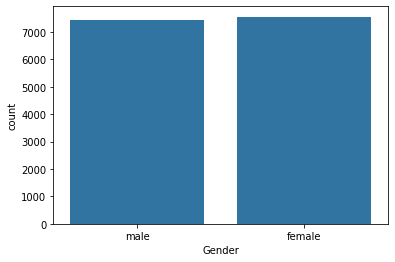

In [113]:
sns.countplot(x='Gender', data=calories_data)

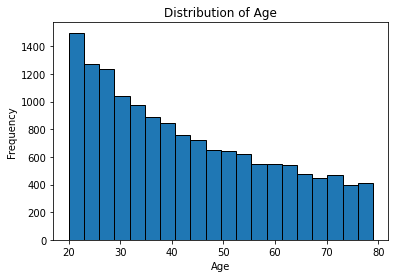

In [114]:
ages = calories_data['Age'].dropna()  # Drop NaN values if any
counts, bin_edges, _ = plt.hist(ages, bins=20, edgecolor='black', )

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the plot
plt.show()

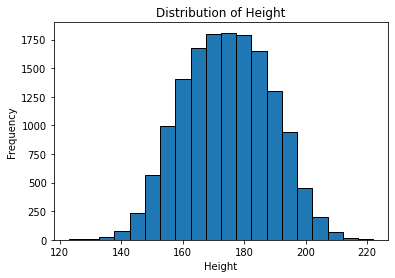

In [115]:
ages = calories_data['Height'].dropna()  # Drop NaN values if any
counts, bin_edges, _ = plt.hist(ages, bins=20, edgecolor='black', )

# Add labels and title
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Height')

# Show the plot
plt.show()

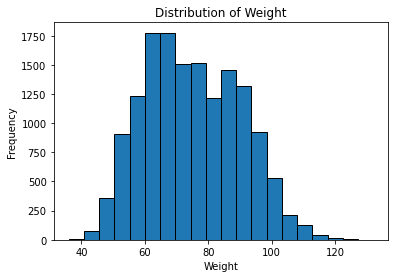

In [116]:
ages = calories_data['Weight'].dropna()  # Drop NaN values if any
counts, bin_edges, _ = plt.hist(ages, bins=20, edgecolor='black', )

# Add labels and title
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Weight')

# Show the plot
plt.show()

In [117]:
correlation =calories_data.drop('Gender',axis=1).corr()

In [118]:
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<AxesSubplot:>

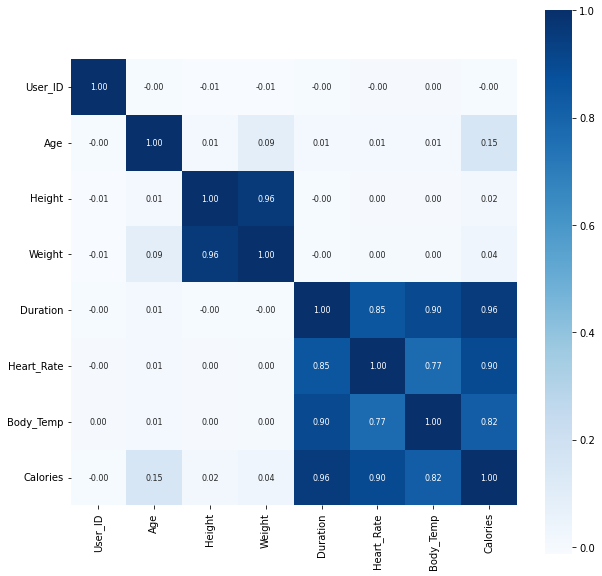

In [119]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=".2f",annot=True,annot_kws={'size':8},cmap='Blues')

In [120]:
# Using apply with a lambda function
calories_data['Gender'] = calories_data['Gender'].apply(
    lambda x: 0 if x == 'male' else 1)

In [121]:
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [122]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y =calories_data['Calories']

In [123]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [124]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [125]:
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.3, random_state=42)

# Split the temporary set into test and evaluation sets
X_test, X_eval, Y_test, Y_eval = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42)

# Check the shapes of the resulting sets
print(f"Training set shape: X_train={X_train.shape}, Y_train={Y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, Y_test={Y_test.shape}")
print(f"Evaluation set shape: X_eval={X_eval.shape}, Y_eval={Y_eval.shape}")

Training set shape: X_train=(10500, 7), Y_train=(10500,)
Test set shape: X_test=(2250, 7), Y_test=(2250,)
Evaluation set shape: X_eval=(2250, 7), Y_eval=(2250,)


In [126]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": XGBRegressor(),
}
metrics = []

In [127]:


# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Evaluate on the evaluation set
    Y_eval_pred = model.predict(X_eval)
    eval_mae = mean_absolute_error(Y_eval, Y_eval_pred)
    eval_mse = mean_squared_error(Y_eval, Y_eval_pred)
    eval_rmse = mean_squared_error(Y_eval, Y_eval_pred, squared=False)
    eval_r2 = r2_score(Y_eval, Y_eval_pred)

    # Evaluate on the test set
    Y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(Y_test, Y_test_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    test_rmse = mean_squared_error(Y_test, Y_test_pred, squared=False)
    test_r2 = r2_score(Y_test, Y_test_pred)

    # Append metrics to the list
    metrics.append({
        "Model": name,
        "Eval MAE": eval_mae,
        "Eval MSE": eval_mse,
        "Eval RMSE": eval_rmse,
        "Eval R^2": eval_r2,
        "Test MAE": test_mae,
        "Test MSE": test_mse,
        "Test RMSE": test_rmse,
        "Test R^2": test_r2
    })

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Save DataFrame to a CSV file
metrics_df.to_csv('../results/model_evaluation_metrics.csv', index=False)

print(metrics_df)

                         Model   Eval MAE    Eval MSE  Eval RMSE  Eval R^2  \
0            Linear Regression   8.500829  136.403401  11.679187  0.965811   
1      Decision Tree Regressor   3.617778   32.270222   5.680689  0.991912   
2      Random Forest Regressor   1.876124    9.391543   3.064563  0.997646   
3  Gradient Boosting Regressor   2.781740   15.314270   3.913345  0.996162   
4     Support Vector Regressor  11.427946  283.229451  16.829422  0.929010   
5            XGBoost Regressor   1.569332    5.580016   2.362206  0.998601   

    Test MAE    Test MSE  Test RMSE  Test R^2  
0   8.403063  129.434830  11.376943  0.966855  
1   3.394222   27.974667   5.289108  0.992836  
2   1.771200    8.000714   2.828553  0.997951  
3   2.631787   12.897908   3.591366  0.996697  
4  11.352805  273.730805  16.544812  0.929905  
5   1.520470    4.523662   2.126890  0.998842  
